In [7]:
import geopandas as gpd
from geopandas import GeoDataFrame
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [8]:
korea=json.load(open('korea.geojson',encoding='utf-8'))
f=pd.json_normalize(korea,record_path=['features'])
f

,type,properties.adm_nm,properties.adm_cd,properties.adm_cd2,properties.sgg,properties.sido,properties.sidonm,properties.temp,properties.sggnm,properties.adm_cd8,geometry.type,geometry.coordinates
0,Feature,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구 사직동,종로구,11010530,MultiPolygon,"[[[[126.97688884274817, 37.575650779448786], [..."
1,Feature,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구 삼청동,종로구,11010540,MultiPolygon,"[[[[126.98268938649305, 37.5950655194224], [12..."
2,Feature,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구 부암동,종로구,11010550,MultiPolygon,"[[[[126.97585113775686, 37.59656422224409], [1..."
3,Feature,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구 평창동,종로구,11010560,MultiPolygon,"[[[[126.97507466788086, 37.63138628651299], [1..."
4,Feature,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구 무악동,종로구,11010570,MultiPolygon,"[[[[126.96067353273895, 37.58079784202973], [1..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3518,Feature,경기도 파주시 교하동,3120059,4148054000,41480,41,경기도,파주시 교하동,파주시,31200511,MultiPolygon,"[[[[126.73764447135378, 37.735999986021035], [..."
3519,Feature,세종특별자치시 세종시 나성동,2901082,3611051800,36110,36,세종특별자치시,세종시 나성동,세종시,29010522,MultiPolygon,"[[[[127.25900166944027, 36.483578590337565], [..."
3520,Feature,세종특별자치시 세종시 어진동,2901084,3611052300,36110,36,세종특별자치시,세종시 어진동,세종시,29010515,MultiPolygon,"[[[[127.25425322883434, 36.50657979994349], [1..."
3521,Feature,경기도 과천시 갈현동,3111061,4129052000,41290,41,경기도,과천시 갈현동,과천시,31110521,MultiPolygon,"[[[[126.99140574935484, 37.41776385296711], [1..."


In [28]:
local=list(f["properties.sidonm"].unique())
color=['#5CD1E5','#6B66FF','#A566FF','#F361DC','#F361A6','#86E57F','#BCE55C','#E5D85C','#F2CB61',
       '#F29661','#F15F5F','#A6A6A6','#8C8C8C','#FFD8D8','b','g','r']
color_dict=dict(zip(local,color))

{'서울특별시': '#5CD1E5',
 '부산광역시': '#6B66FF',
 '대구광역시': '#A566FF',
 '인천광역시': '#F361DC',
 '광주광역시': '#F361A6',
 '대전광역시': '#86E57F',
 '울산광역시': '#BCE55C',
 '세종특별자치시': '#E5D85C',
 '경기도': '#F2CB61',
 '강원특별자치도': '#F29661',
 '충청북도': '#F15F5F',
 '충청남도': '#A6A6A6',
 '전라북도': '#8C8C8C',
 '전라남도': '#FFD8D8',
 '경상북도': 'b',
 '경상남도': 'g',
 '제주특별자치도': 'r'}

In [31]:
color_dict[f["properties.sidonm"][0]]

'#5CD1E5'

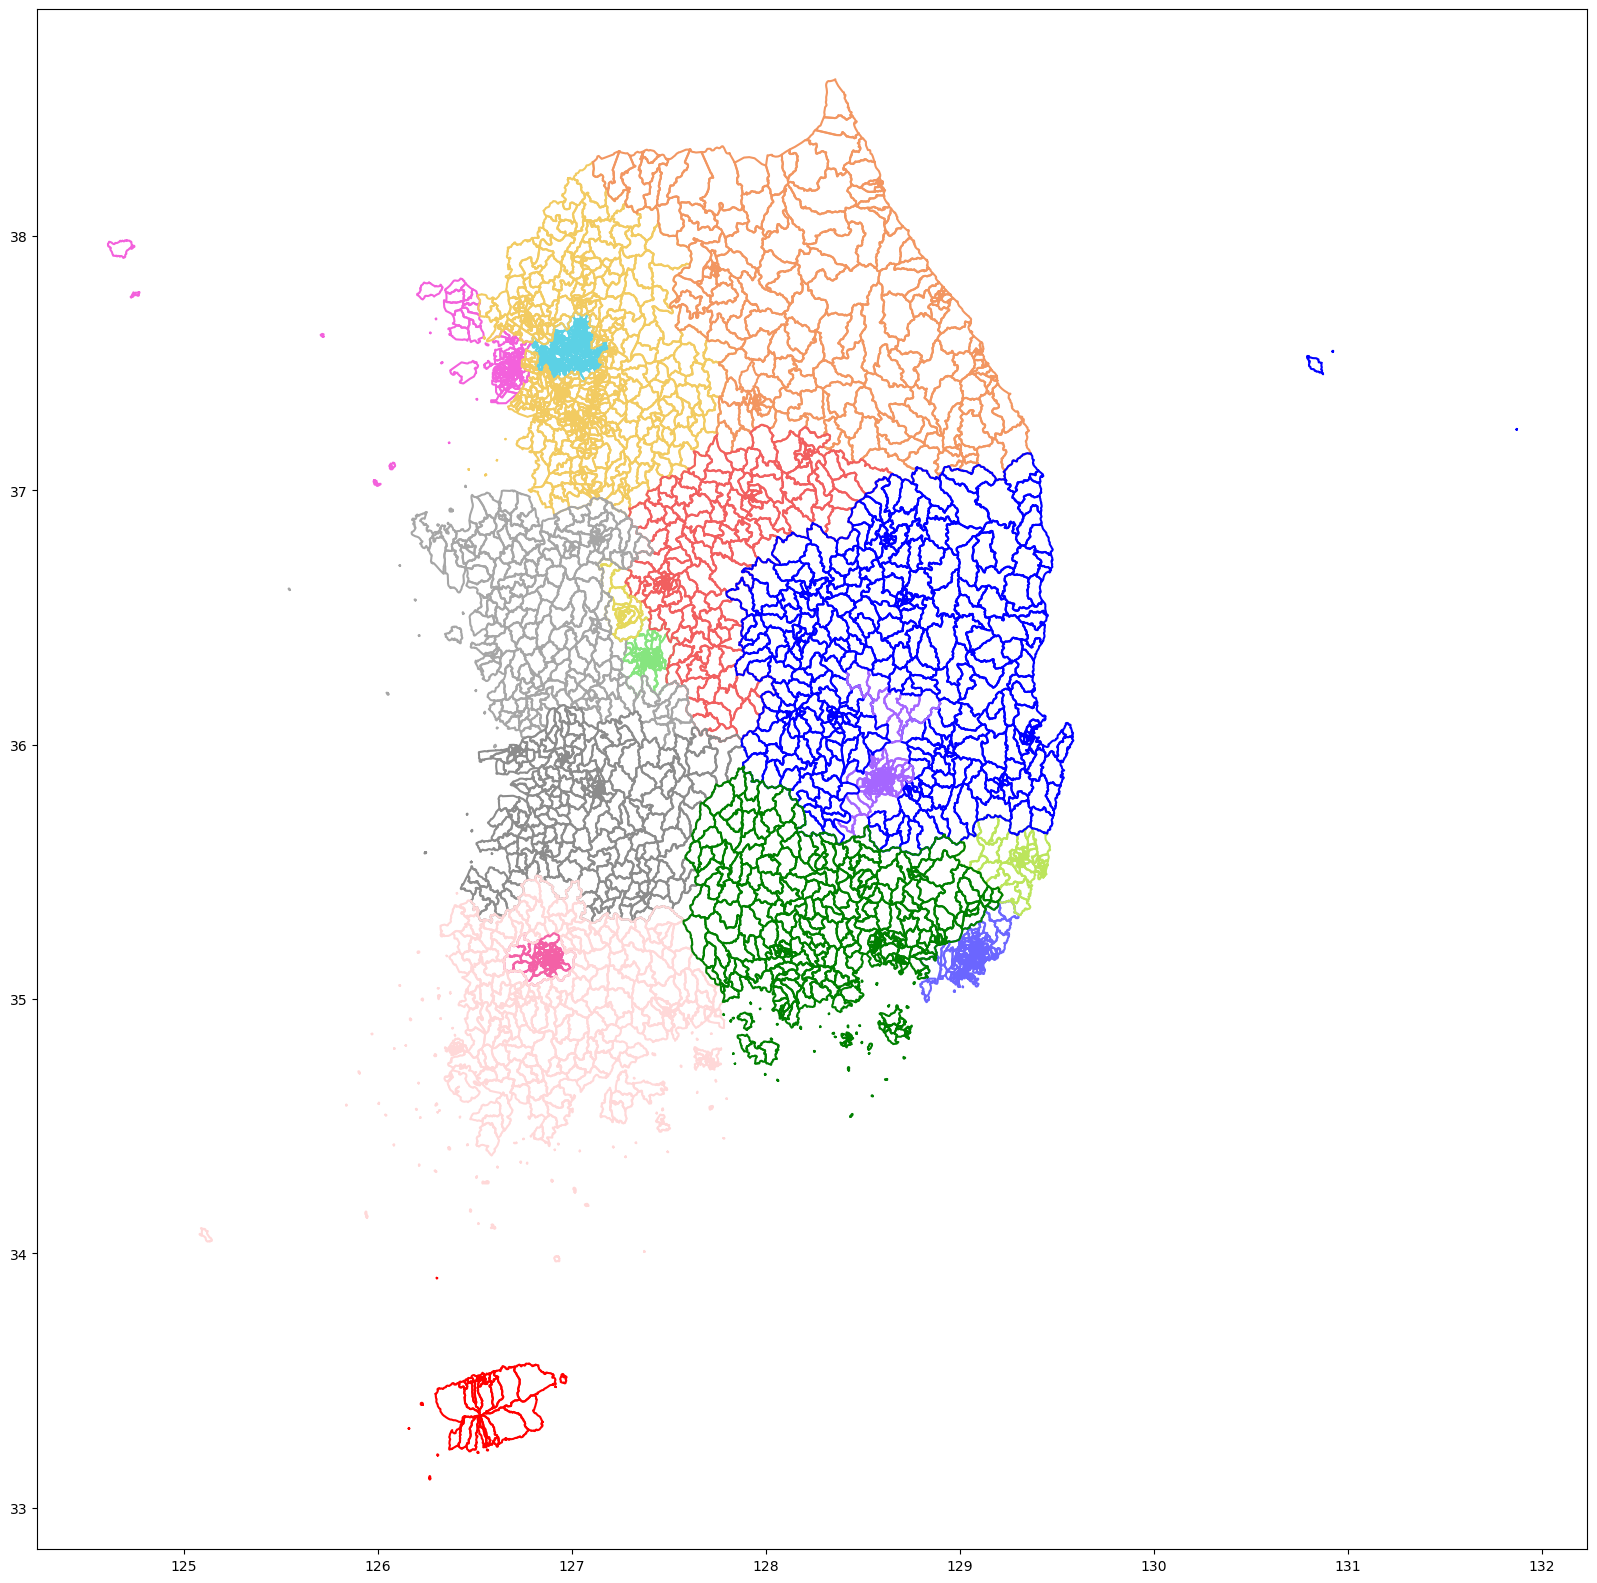

In [33]:
plt.figure(figsize=(20,20)) 
for i in range(f.count()[0]) :
    coordinates=pd.DataFrame(f["geometry.coordinates"][i][0][0])
    x=coordinates[0].to_list()
    y=coordinates[1].to_list()
    plt.plot(x,y,color=color_dict[f["properties.sidonm"][i]])